# IMPORTING IMPORTANT LIBRAIES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATASET

In [2]:
df=pd.read_csv('Rainfall Weather Forecasting.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [4]:
print("NUMBER OF ROW IN DATASET : ",df.shape[0])
print("NUMBER OF COLUMNS IN DATASET : ",df.shape[1])

NUMBER OF ROW IN DATASET :  8425
NUMBER OF COLUMNS IN DATASET :  23


# FEATURES OF DATASET

Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

    a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

    b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm


Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight


WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


# LET'S UNDERSTAND DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

OBSERVATION:-
    
    * AS WE SEEN THEIR IS 8425 ENTRIES
    * EXCEPT DATE AND LOCATION COLUMNS ALL COLUMNS HAVE NULL VALUE

# LET'S CHECK NULL AND UNIQUE VALUE

In [6]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

# LETS FILL THE NULL VALUE IN DATASET

In [19]:
for i in df.columns[2:]:
    if df[i].dtypes=='object':
        df[i].fillna(value=df[i].mode()[0],inplace=True)
    if df[i].dtypes=='float64':
        df[i].fillna(value=df[i].median(),inplace=True)

In [21]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

NOW THEIR IS NO NULL VALUE IN THE DATASET

<AxesSubplot:>

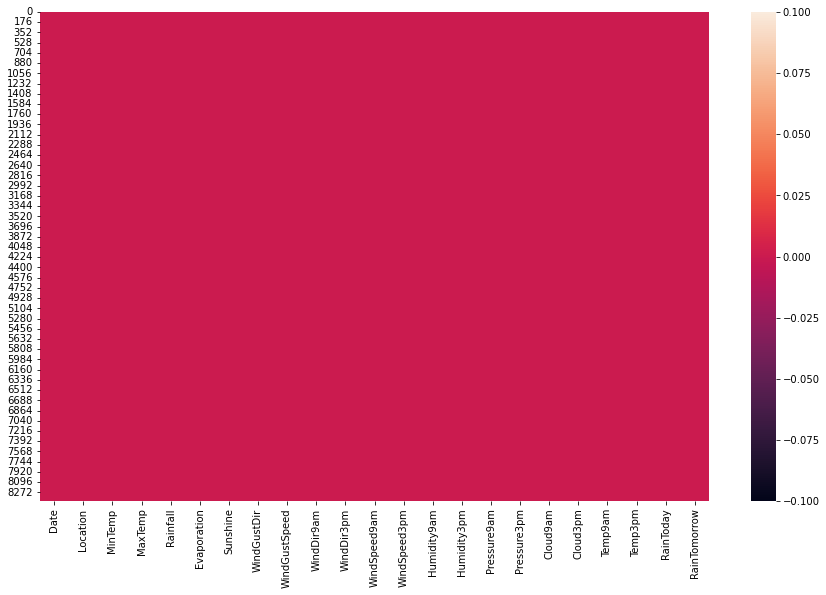

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull())

# THERE IS NO NEED OF DATE COLUMN SO WE HAVE TO DROP THAT

In [24]:
df.drop('Date',axis=1,inplace=True)

# START DATA VISUALIZATION

# 1.) UNIVARIATE ANALAYSIS

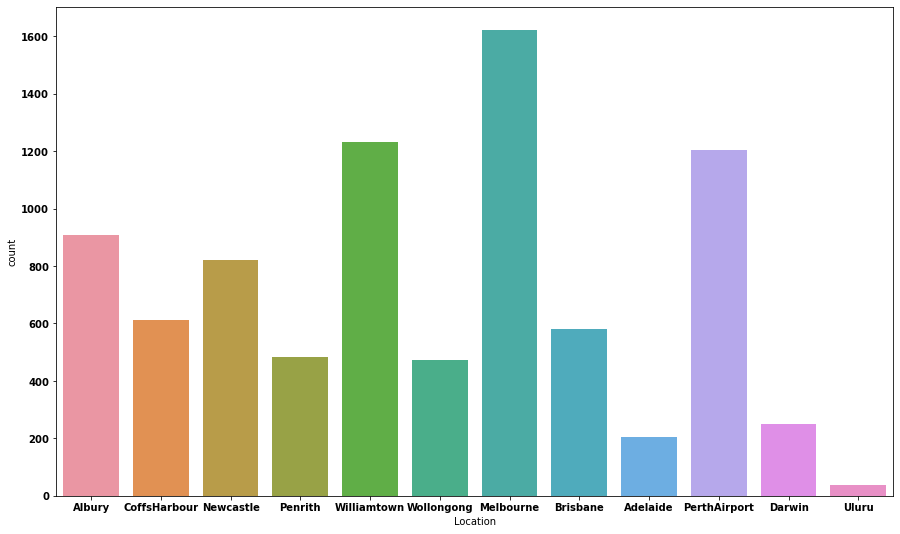

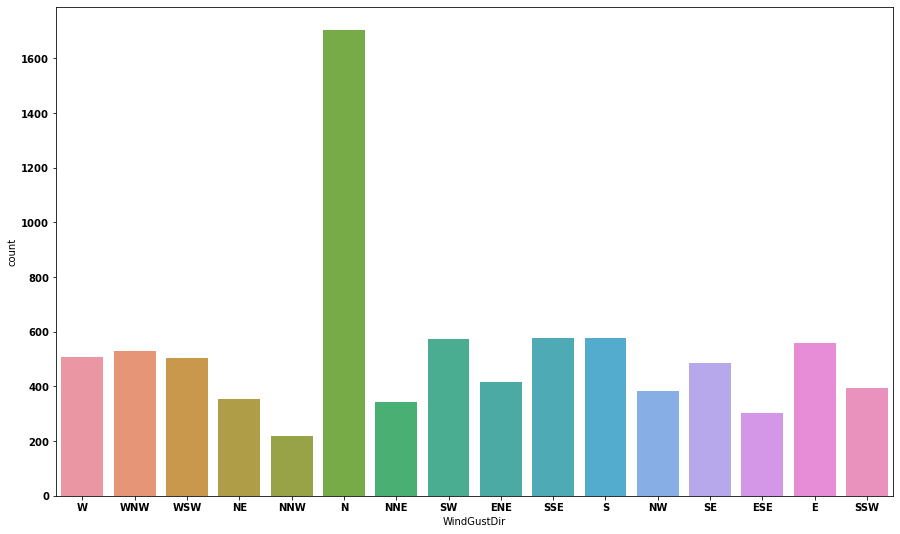

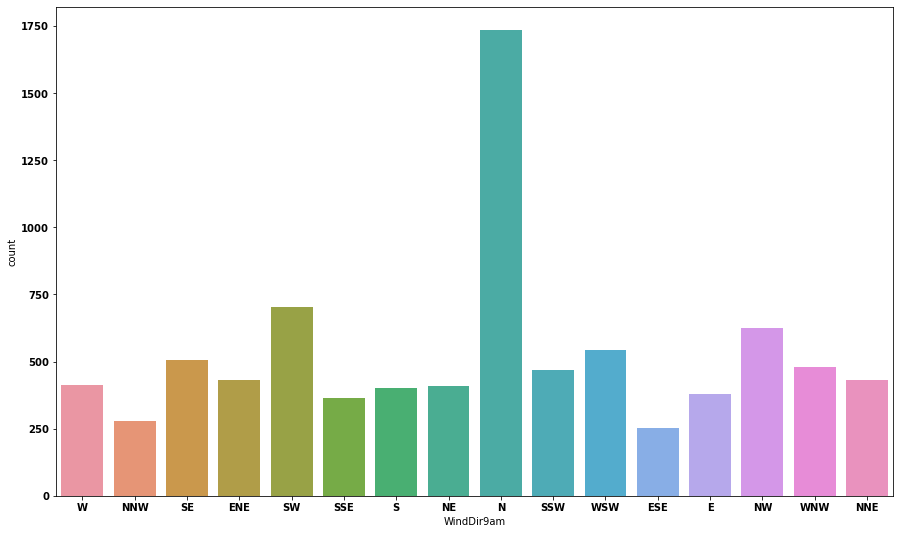

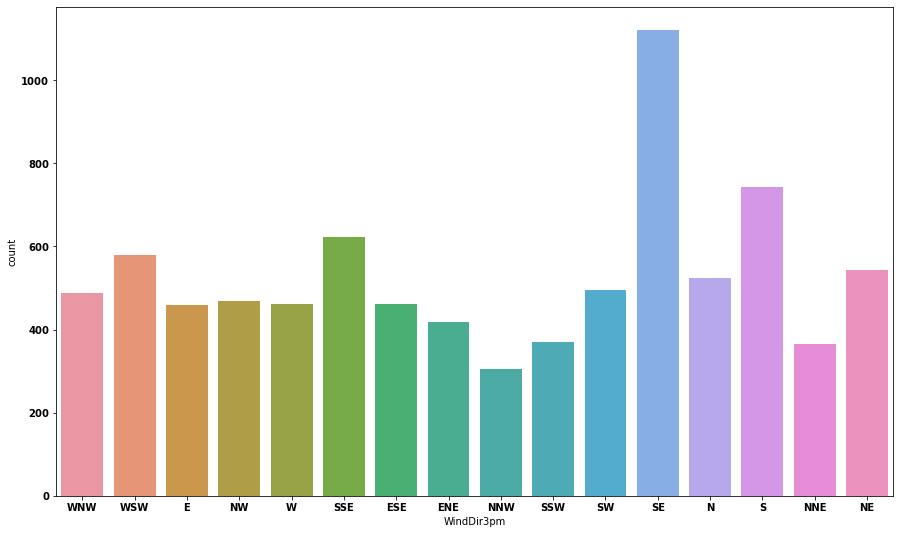

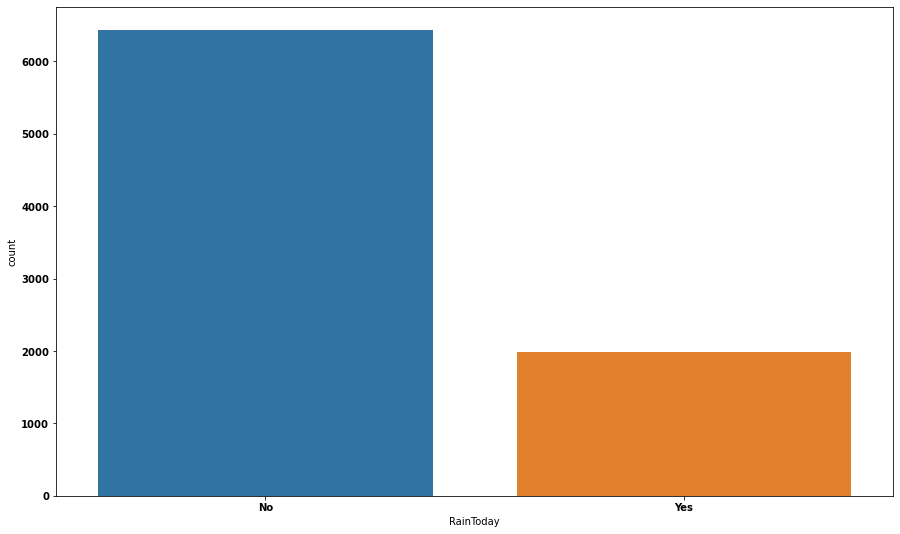

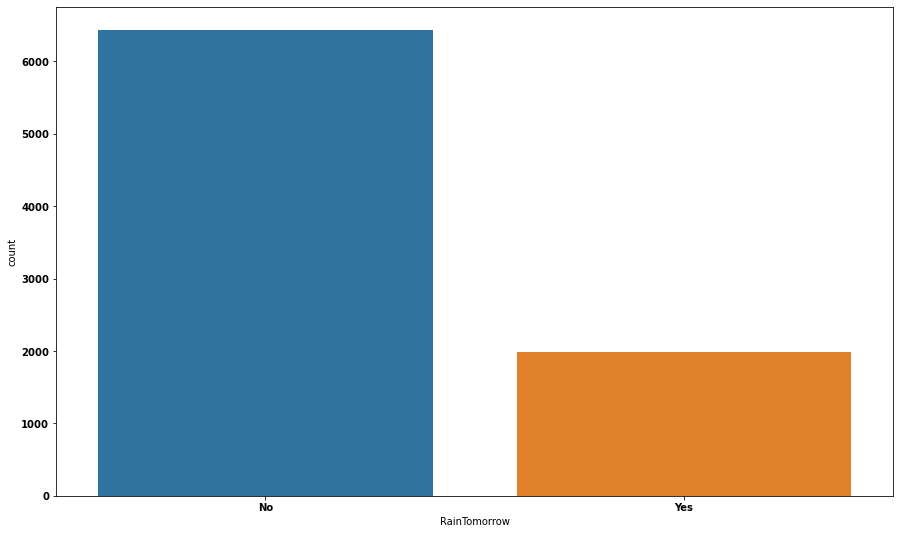

In [25]:
for i in df.columns:
    if df[i].dtype=='O':
        plt.figure(figsize=(15,9))
        sns.countplot(df[i])
        
        
        plt.xticks(fontweight="bold")
        plt.yticks(fontweight="bold")
    if df[i].dtype=='int64':
        plt.figure(figsize=(15,9))
        sns.distplot(df[i])
        plt.xticks(fontweight="bold")
        plt.yticks(fontweight="bold")

# 2.)MULTIVARIATE ANALAYSIS

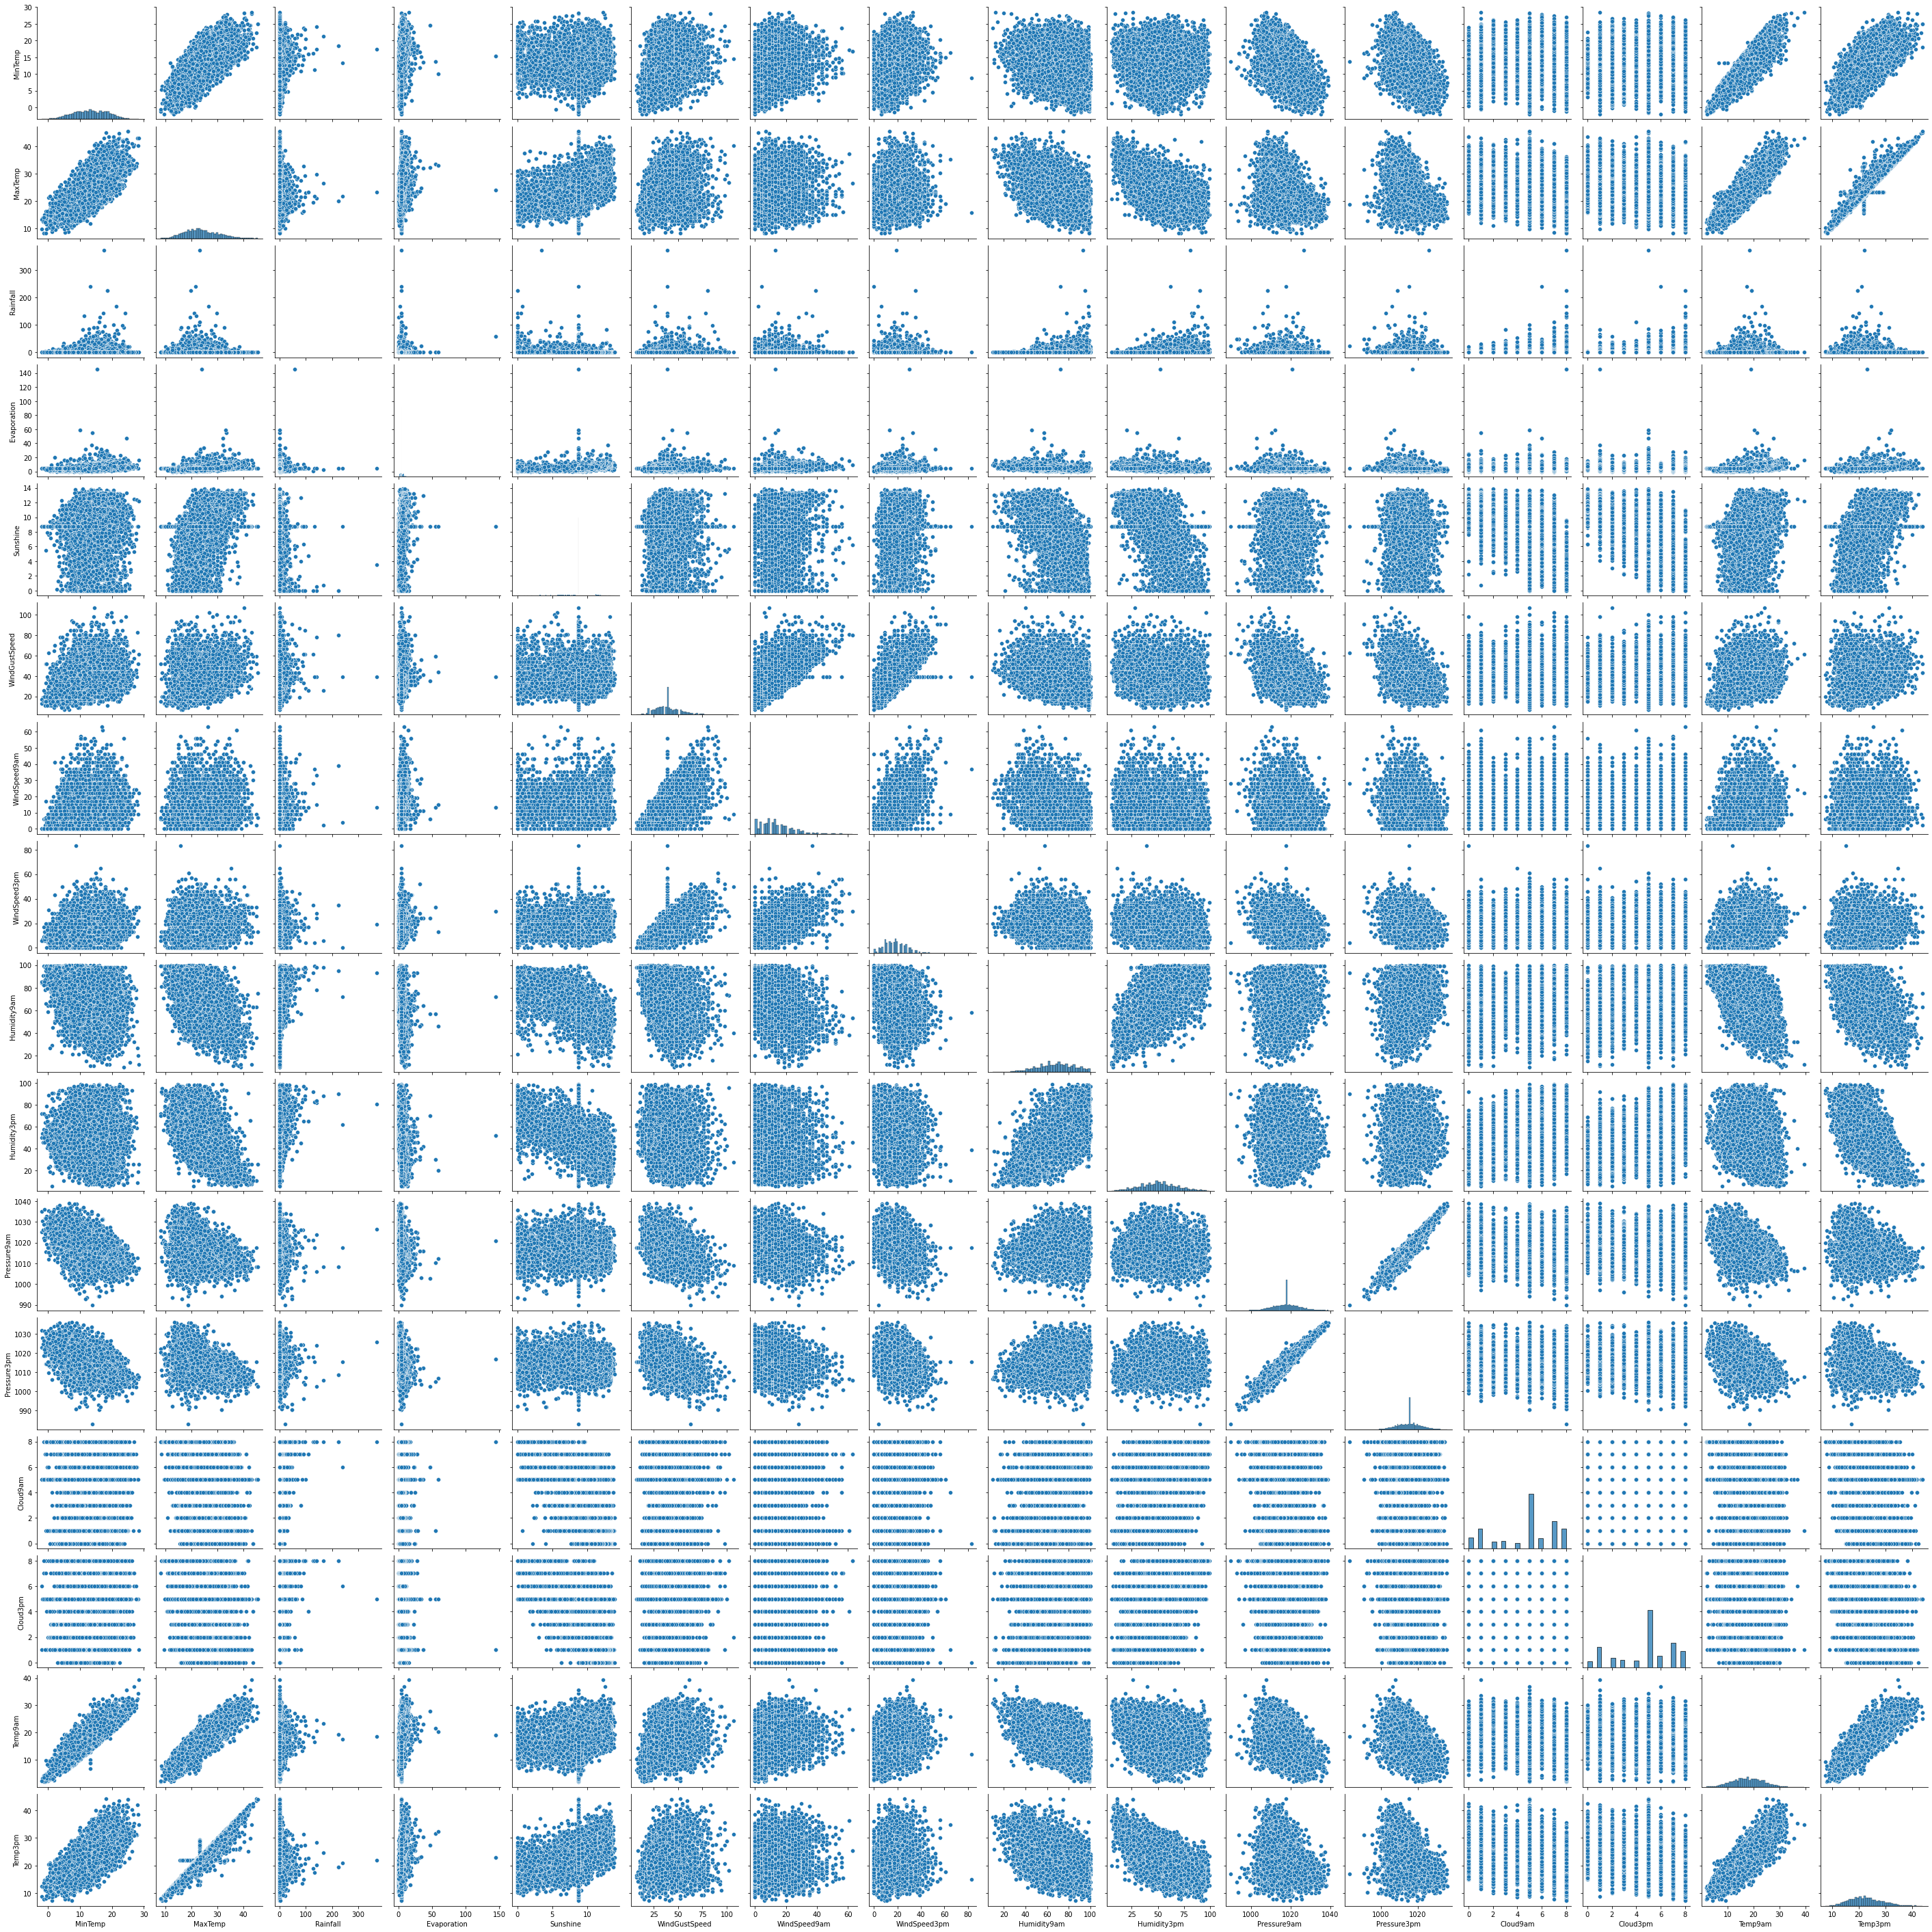

In [26]:
sns.pairplot(df)

In [27]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      Albury     13.4     22.9       0.6          4.6       8.7           W   
1      Albury      7.4     25.1       0.0          4.6       8.7         WNW   
2      Albury     12.9     25.7       0.0          4.6       8.7         WSW   
3      Albury      9.2     28.0       0.0          4.6       8.7          NE   
4      Albury     17.5     32.3       1.0          4.6       8.7           W   
...       ...      ...      ...       ...          ...       ...         ...   
8420    Uluru      2.8     23.4       0.0          4.6       8.7           E   
8421    Uluru      3.6     25.3       0.0          4.6       8.7         NNW   
8422    Uluru      5.4     26.9       0.0          4.6       8.7           N   
8423    Uluru      7.8     27.0       0.0          4.6       8.7          SE   
8424    Uluru     14.9     23.3       0.0          4.6       8.7           N   

      WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0              44.0          W        WNW  ...         71.0         22.0   
1              44.0        NNW        WSW  ...         44.0         25.0   
2              46.0          W        WSW  ...         38.0         30.0   
3              24.0         SE          E  ...         45.0         16.0   
4              41.0        ENE         NW  ...         82.0         33.0   
...             ...        ...        ...  ...          ...          ...   
8420           31.0         SE        ENE  ...         51.0         24.0   
8421           22.0         SE          N  ...         56.0         21.0   
8422           37.0         SE        WNW  ...         53.0         24.0   
8423           28.0        SSE          N  ...         51.0         24.0   
8424           39.0        ESE        ESE  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       5.0     16.9     21.8   
1          1010.6       1007.8       5.0       5.0     17.2     24.3   
2          1007.6       1008.7       5.0       2.0     21.0     23.2   
3          1017.6       1012.8       5.0       5.0     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       5.0       5.0     10.1     22.4   
8421       1023.5       1019.1       5.0       5.0     10.9     24.5   
8422       1021.0       1016.8       5.0       5.0     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No            No  

[8425 rows x 22 columns]

# 1.)Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

# ENCODING OF DATAFRAME

WE HAVE LOT OF CATEGORICAL DATA IN DATADRAME SO WE NEED TO ENCODE DATA INTO NUMERICAL DATA SO WILL BE UNDERSTABLE BY MACHINE

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])
df.head()


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          4.6       8.7           13   
1         1      7.4     25.1       0.0          4.6       8.7           14   
2         1     12.9     25.7       0.0          4.6       8.7           15   
3         1      9.2     28.0       0.0          4.6       8.7            4   
4         1     17.5     32.3       1.0          4.6       8.7           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          13          14  ...         71.0         22.0   
1           44.0           6          15  ...         44.0         25.0   
2           46.0          13          15  ...         38.0         30.0   
3           24.0           9           0  ...         45.0         16.0   
4           41.0           1           7  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       5.0     16.9     21.8          0   
1       1010.6       1007.8       5.0       5.0     17.2     24.3          0   
2       1007.6       1008.7       5.0       2.0     21.0     23.2          0   
3       1017.6       1012.8       5.0       5.0     18.1     26.5          0   
4       1010.8       1006.0       7.0       8.0     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 22 columns]

# REMOVING OUTLIERS

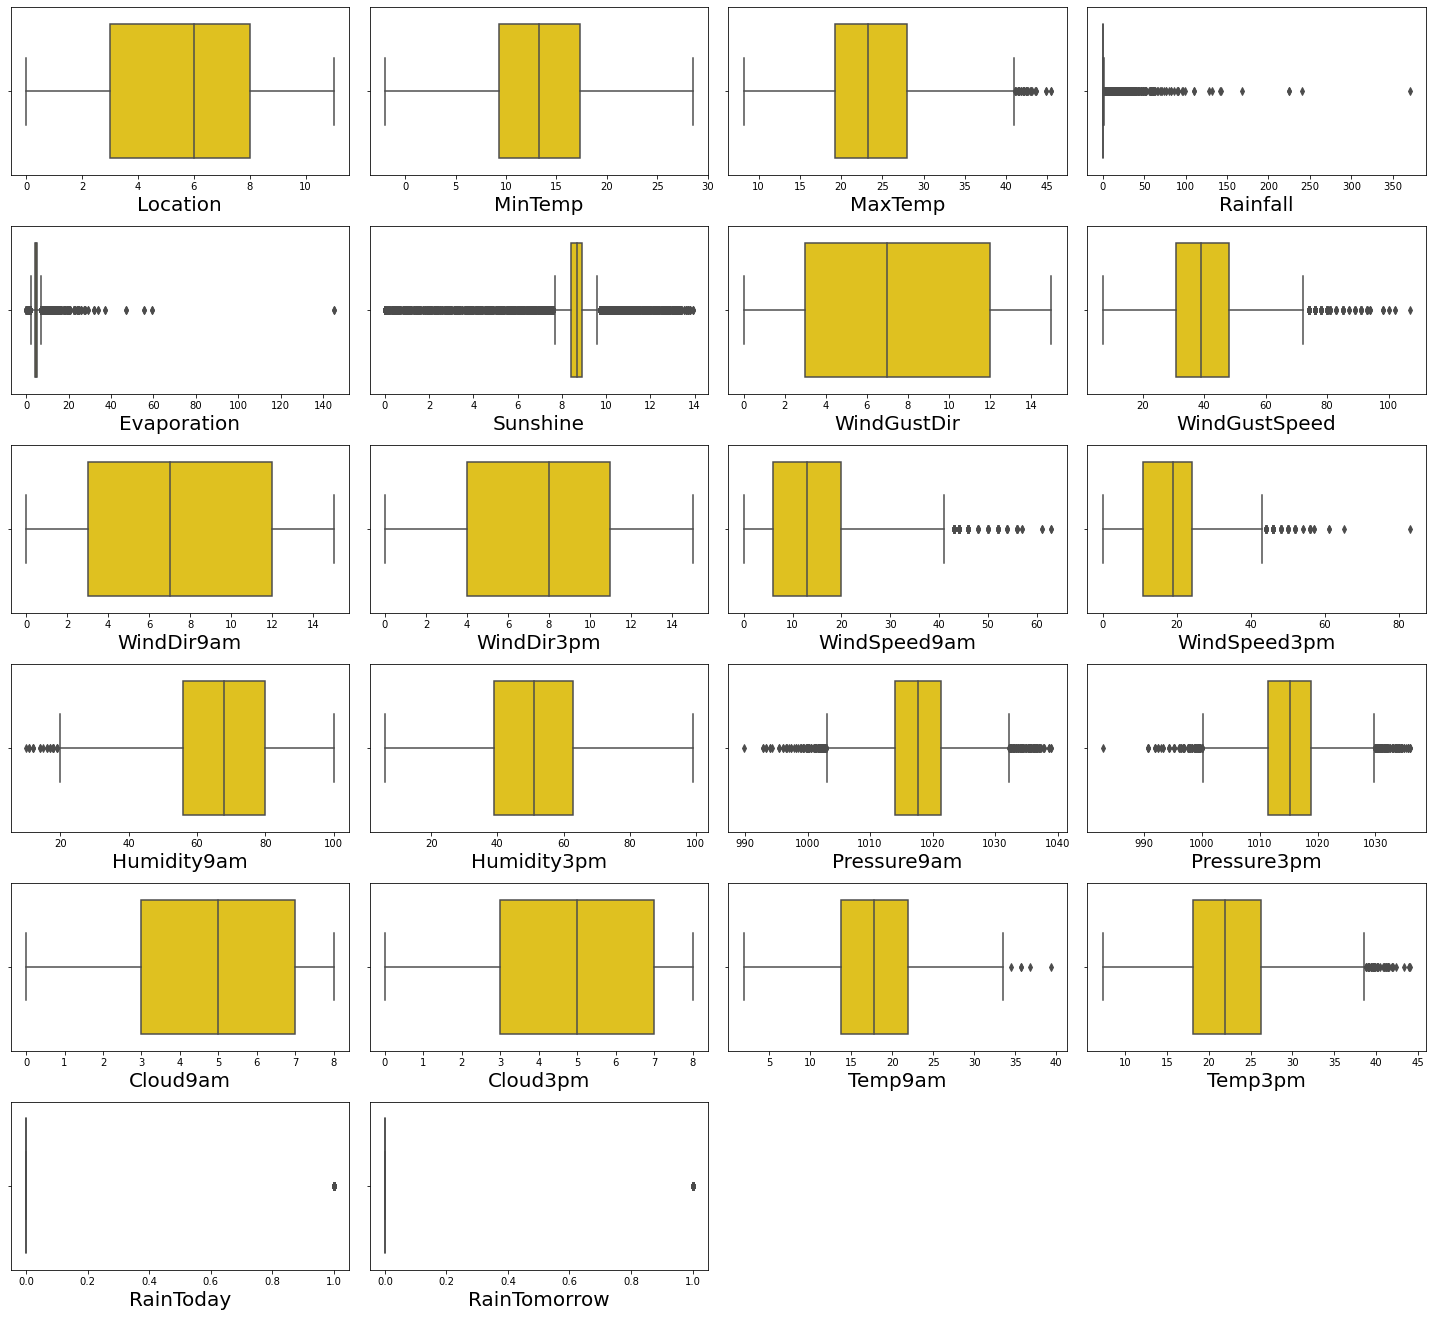

In [102]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i],color='gold')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   67,   68,   68,  123,  267,  296,  381,  381,
         405,  405,  406,  406,  407,  407,  431,  462,  563,  568,  568,
         569,  602,  683,  683,  699,  713,  748,  748,  770,  796,  797,
         802,  928,  935,  949,  979,  980,  980,  980, 1008, 1009, 1011,
        1138, 1148, 1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265,
        1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644,
        1661, 1665, 1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016,
        2028, 2043, 2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230,
        2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676,
        2677, 2735, 2827, 2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877,
        2883, 2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919,
        2925, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051,
        3051, 3058, 3059, 3059, 3060, 

In [104]:
df_new=df[(z<3).all(axis=1)]
df_new

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4     22.9       0.6          4.6       8.7   
1            1      7.4     25.1       0.0          4.6       8.7   
2            1     12.9     25.7       0.0          4.6       8.7   
3            1      9.2     28.0       0.0          4.6       8.7   
4            1     17.5     32.3       1.0          4.6       8.7   
...        ...      ...      ...       ...          ...       ...   
8420         9      2.8     23.4       0.0          4.6       8.7   
8421         9      3.6     25.3       0.0          4.6       8.7   
8422         9      5.4     26.9       0.0          4.6       8.7   
8423         9      7.8     27.0       0.0          4.6       8.7   
8424         9     14.9     23.3       0.0          4.6       8.7   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0              13           44.0          13          14  ...         71.0   
1              14           44.0           6          15  ...         44.0   
2              15           46.0          13          15  ...         38.0   
3               4           24.0           9           0  ...         45.0   
4              13           41.0           1           7  ...         82.0   
...           ...            ...         ...         ...  ...          ...   
8420            0           31.0           9           1  ...         51.0   
8421            6           22.0           9           3  ...         56.0   
8422            3           37.0           9          14  ...         53.0   
8423            9           28.0          10           3  ...         51.0   
8424            3           39.0           2           2  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       5.0     16.9   
1            25.0       1010.6       1007.8       5.0       5.0     17.2   
2            30.0       1007.6       1008.7       5.0       2.0     21.0   
3            16.0       1017.6       1012.8       5.0       5.0     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3       5.0       5.0     10.1   
8421         21.0       1023.5       1019.1       5.0       5.0     10.9   
8422         24.0       1021.0       1016.8       5.0       5.0     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   
8424         36.0       1020.2       1017.9       8.0       8.0     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8          0             0  
1        24.3          0             0  
2        23.2          0             0  
3        26.5          0             0  
4        29.7          0             0  
...       ...        ...           ...  
8420     22.4          0             0  
8421     24.5          0             0  
8422     26.1          0             0  
8423     26.0          0             0  
8424     20.9          0             0  

[7987 rows x 22 columns]

In [105]:
df_new.shape

(7987, 22)

In [106]:
df.shape

(8425, 22)

In [107]:
data_loss=((8425-7987)/8425)*100
data_loss

5.198813056379822

# 5% is less then 10 %

In [108]:
df=df_new

# seprating the columns into feature and target

In [109]:
X=df.drop('RainTomorrow',axis=1)

In [110]:
y=df["RainTomorrow"]

# SCALING BY MIN MAX SCALING

In [111]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [112]:
X=mms.fit_transform(X)

# MACHIME LEARNING MODEL

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [114]:
X_train.shape

(5590, 21)

In [115]:
y_train.shape

(5590,)

In [116]:
X_test.shape

(2397, 21)

In [117]:
y_test.shape

(2397,)

# with MultinomialNB

In [118]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
predmnb=mnb.predict(X_test)
predmnb

array([0, 0, 0, ..., 1, 0, 0])

In [119]:
print(accuracy_score(y_test,predmnb)*100)
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

77.84730913642053
[[1777   40]
 [ 491   89]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1817
           1       0.69      0.15      0.25       580

    accuracy                           0.78      2397
   macro avg       0.74      0.57      0.56      2397
weighted avg       0.76      0.78      0.72      2397



# 2.) DECISION TREE CLASSIFIER

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
preddtc

array([1, 0, 0, ..., 1, 0, 0])

In [122]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

82.97872340425532
[[1617  200]
 [ 208  372]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1817
           1       0.65      0.64      0.65       580

    accuracy                           0.83      2397
   macro avg       0.77      0.77      0.77      2397
weighted avg       0.83      0.83      0.83      2397



# 3.) SVM(SUPPORT VECTOR MACHINE)

In [123]:
from sklearn.svm import SVC

In [124]:
sv=SVC()
sv.fit(X_train,y_train)
predsv=sv.predict(X_test)
predsv

array([0, 0, 0, ..., 1, 0, 0])

In [125]:
print(accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

83.52106800166875
[[1747   70]
 [ 325  255]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1817
           1       0.78      0.44      0.56       580

    accuracy                           0.84      2397
   macro avg       0.81      0.70      0.73      2397
weighted avg       0.83      0.84      0.82      2397



# 4.)KNeighborsClassifier

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
predknn

array([0, 0, 0, ..., 0, 0, 0])

In [128]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

81.05965790571548
[[1701  116]
 [ 338  242]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1817
           1       0.68      0.42      0.52       580

    accuracy                           0.81      2397
   macro avg       0.76      0.68      0.70      2397
weighted avg       0.80      0.81      0.79      2397



# 5.)logestic regression

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)

In [131]:
print(accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

82.56153525239883
[[1718   99]
 [ 319  261]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1817
           1       0.72      0.45      0.56       580

    accuracy                           0.83      2397
   macro avg       0.78      0.70      0.72      2397
weighted avg       0.81      0.83      0.81      2397



# RESULT :-

* LOGESTIC REGRESSION:-82.5%
* KNEIGHBOURS CLASSIFIER:-81.05%
* SVM(SUPPORT VECTOR MACHINE):-83.5%
* DECISION TREE CLASSIFIER:-82.9%
* with MultinomialNB:- 77%

# SAVING THE MODEL

In [132]:
import joblib
joblib.dump(lr,"RAIN_TOMORROW_DATASET.pkl")

['RAIN_TOMORROW_DATASET.pkl']

# PREDICTION

In [133]:
model = joblib.load("RAIN_TOMORROW_DATASET.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [134]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     0     0     0     0     0     0     0     0     0     0  ...   
Original      0     1     0     0     0     1     0     1     0     0  ...   

           2387  2388  2389  2390  2391  2392  2393  2394  2395  2396  
Predicted     0     0     0     1     0     0     0     1     0     0  
Original      0     0     0     1     0     0     0     1     0     0  

[2 rows x 2397 columns]

# 2.)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# seprating the columns into feature and target

In [135]:
x=df.drop('Rainfall',axis=1)

In [136]:
y=df["Rainfall"]

# SCALING BY MIN MAX SCALING

In [137]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [138]:
X=mms.fit_transform(x)

# MACHIME LEARNING MODEL

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# SELECT BEST RANDOM STATE

In [140]:
lin_reg=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=i)
    lin_reg.fit(x_train,y_train)
    pred_train=lin_reg.predict(x_train)
    pred_test=lin_reg.predict(x_test)
    print(f'At random state{i}, The training accuracy is : {r2_score(y_train,pred_train)}')
    print(f'At random state{i}, The test accuracy is : {r2_score(y_test,pred_test)}')
    print('\n')

At random state0, The training accuracy is : 0.49438000051489017
At random state0, The test accuracy is : 0.5075093320387655


At random state1, The training accuracy is : 0.5011503367414075
At random state1, The test accuracy is : 0.49368892470466663


At random state2, The training accuracy is : 0.5041365253619565
At random state2, The test accuracy is : 0.4869134597936533


At random state3, The training accuracy is : 0.49503303056756087
At random state3, The test accuracy is : 0.5051440159765873


At random state4, The training accuracy is : 0.5007189818678683
At random state4, The test accuracy is : 0.49229959219890973


At random state5, The training accuracy is : 0.506706355335383
At random state5, The test accuracy is : 0.48224444821081724


At random state6, The training accuracy is : 0.5029817235450671
At random state6, The test accuracy is : 0.4875961801820641


At random state7, The training accuracy is : 0.5077130312621341
At random state7, The test accuracy is : 0.4796379

AS WE CONCLUDE THAT 5 STATE GAVE HIGHEST VALUE, SO TAKE 5 AS RANDOM STATE

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5,test_size=0.33)

In [142]:
x_train.shape

(5351, 21)

In [143]:
y_train.shape

(5351,)

In [144]:
x_test.shape

(2636, 21)

In [145]:
y_test.shape

(2636,)

# 1.) LINEAR REGRESSION

In [146]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)

In [147]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 1.5549701730088457
Mean squared error : 11.728422043378613
Root Mean squared error : 3.4246783853930887
 R2 Score :
48.224444821081725


In [148]:
score=cross_val_score(lr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',lr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.4918359639350333
Difference in R2 & CV Score: -0.9591515724216038


# 2.) SGD

In [149]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)

In [150]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 43319243575158.69
Mean squared error : 2.3600394302821742e+27
Root Mean squared error : 48580237034026.234
 R2 Score :
-1.0418481812392006e+28


In [151]:
score=cross_val_score(sgd,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',sgd,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : SGDRegressor() :

Mean CV Score : -7.85676319277145e+27
Difference in R2 & CV Score: 7.752578374647529e+29


# 3.) RANDOM FOREST REGRESSION

In [152]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [153]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 1.1469654779969651
Mean squared error : 9.03760509825493
Root Mean squared error : 3.0062609830576803
 R2 Score :
60.10315627121009


In [154]:
score=cross_val_score(rfr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',rfr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.5838945865152309
Difference in R2 & CV Score: 1.7136976196870037


# 4.)DECISION TREE REGRESSION

In [155]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [156]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 1.3256828528072837
Mean squared error : 17.98591426403642
Root Mean squared error : 4.240980342330817
 R2 Score :
20.600512756390298


In [157]:
score=cross_val_score(dtr,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',dtr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.3222265094329585
Difference in R2 & CV Score: -11.622138186905548


# 5.) EXTRA TREE REGRESSION

In [158]:
etc=ExtraTreesRegressor()
etc.fit(x_train,y_train)
pred=etc.predict(x_test)

In [159]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 1.0496456752655543
Mean squared error : 9.062872927162367
Root Mean squared error : 3.0104605838911707
 R2 Score :
59.99161050102808


In [160]:
score=cross_val_score(etc,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6008599597243913
Difference in R2 & CV Score: -0.09438547141105857


# 6.)XGBOOST REGRESSION

In [161]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
pred=xg.predict(x_test)

In [162]:
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,pred)*100)

Error :
Mean absolute error : 1.163013536519564
Mean squared error : 9.52828820643421
Root Mean squared error : 3.086792543471979
 R2 Score :
57.937017446316574


In [163]:
score=cross_val_score(xg,x,y,cv=5)
print('\033[1m'+'Cross Validation Score :',xg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.5334669214073724
Difference in R2 & CV Score: 4.590325305579334


# HYPER PARAMETER TUNING: GRIDSEARCHCV

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameters to tune
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Define the search space
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Create a Random Forest Regression model
rf = RandomForestRegressor()

# Perform random search cross-validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1,
                               scoring='neg_mean_squared_error')

# Fit the random search model
rf_random.fit(x_train, y_train)

# Print the best hyperparameters found
print(rf_random.best_params_)

# Evaluate the model
y_pred = rf_random.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90}
Mean Squared Error: 8.77


In [170]:
rf = RandomForestRegressor(n_estimators=1800, min_samples_split=2, min_samples_leaf=1,
                            max_features='sqrt', max_depth=90)

# Train the model on the entire training dataset
rf.fit(x_train, y_train)

# Make predictions on new data
y_pred = rf.predict(x_test)


# SAVING THE MODEL

In [172]:
import joblib
joblib.dump(rf,"Rainfall_DATASET.pkl")

['Rainfall_DATASET.pkl']

# PREDICTION

In [173]:
model = joblib.load("Rainfall_DATASET.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([0.19144444, 0.05627778, 0.15238889, ..., 0.28172222, 0.15666667,
       1.41711111])

In [174]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0         1         2         3         4         5     \
Predicted  0.191444  0.056278  0.152389  0.089611  0.000056  0.354167   
Original   0.000000  0.000000  0.200000  0.000000  0.000000  1.000000   

               6         7         8         9     ...      2626    2627  \
Predicted  0.002444  7.352833  0.045056  0.043444  ...  0.001778  0.1635   
Original   0.000000  4.800000  0.000000  0.000000  ...  0.000000  0.2000   

               2628      2629      2630      2631      2632      2633  \
Predicted  6.963167  0.156778  0.046111  0.151111  0.001889  0.281722   
Original   2.600000  0.000000  0.000000  0.000000  0.000000  0.000000   

               2634      2635  
Predicted  0.156667  1.417111  
Original   0.000000  0.000000  

[2 rows x 2636 columns]

# END PROJECT

# THANK YOU